In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full.csv")
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [3]:
archetypes = ["Sahel", "Central", "Southern"]
df["archetype"] = pd.Categorical(df["archetype"], categories = archetypes, ordered=True)
# weekdayhour.Weekday = pd.Categorical(weekdayhour.Weekday,categories=weekdays)
# weekdayhour = weekdayhour.sort_values('Weekday')

In [4]:
df_pfpr["cost_per_1k"] = df_pfpr["cost_mean"]/5
df_pfpr["percent_cases_averted"] = df_pfpr["frac_averted_clinical__all"]*100

In [5]:
scenarios_to_plot = [1,4,13,16,30]
sahel_esmc_scenarios = [35,36] # 35,36 only for e-SMC in Sahel
itn_scenario = [31]

In [6]:
df_scatterplot = df_pfpr[np.in1d(df_pfpr["scenario_number"], scenarios_to_plot)]
df_sahel_extra = df_pfpr[np.logical_and(df_pfpr["archetype"]=="Sahel", 
                                        np.in1d(df_pfpr["scenario_number"], sahel_esmc_scenarios))]
df_scatterplot_itn = df_pfpr[np.in1d(df_pfpr["scenario_number"], itn_scenario)]
# df_list = []
# for a, sdf in df_pfpr.groupby("archetype"):
#     df_list.append(sdf[np.in1d(sdf["scenario_number"], scenarios_to_plot)])
#     if a == "Sahel":
#         df_list.append(sdf[np.in1d(sdf["scenario_number"], sahel_esmc_scenarios)])
                       
# df_scatterplot = pd.concat(df_list, ignore_index=True)

In [8]:
df_simpler = df_scatterplot[np.logical_and(df_scatterplot["archetype"]=="Sahel", 
                                           df_scatterplot["transmission_level"] == 0.2)]

In [12]:
df_simpler

,archetype,baseline_transmission_metric,transmission_level,scenario_number,iptsc_rdts_used,iptsc_drugs_used,cases_treated,severe_cases_treated,received_smc,received_ivermectin,...,cost_SMC_mean,cost_mean,cost_low_IPTsc_only,cost_high_IPTsc_only,cost_low_SMC_only,cost_high_SMC_only,cost_low,cost_high,cost_per_1k,percent_cases_averted
451,Sahel,pfpr,0.2,1,0.0,5295.6,4483.6,0.0,6535.3,0.0,...,10924.739040,55265.253040,53544.183040,56986.323040,49753.712580,60776.7935,31443.322580,79087.1835,11053.050608,14.784964
454,Sahel,pfpr,0.2,4,0.0,15974.8,3479.8,0.0,6491.2,0.0,...,10868.318602,55822.386602,50151.332602,61493.440602,50365.337205,61279.4360,31819.023205,79825.7500,11164.477320,35.972875
463,Sahel,pfpr,0.2,13,0.0,5326.0,3606.5,0.0,6526.0,0.0,...,10912.840852,58626.595852,56895.645852,60357.545852,53126.546705,64126.6450,38051.546705,79201.6450,11725.319170,32.314077
466,Sahel,pfpr,0.2,16,0.0,15953.9,2951.9,0.0,6468.1,0.0,...,10838.765040,80613.257540,74949.623040,86276.892040,75184.751080,86041.7640,58599.086580,102627.4285,16122.651508,46.702070
480,Sahel,pfpr,0.2,30,0.0,0.0,5232.0,0.0,6494.4,0.0,...,10872.412602,56438.012602,56438.012602,56438.012602,50977.009205,61899.0160,31618.609205,81257.4160,11287.602520,0.000000


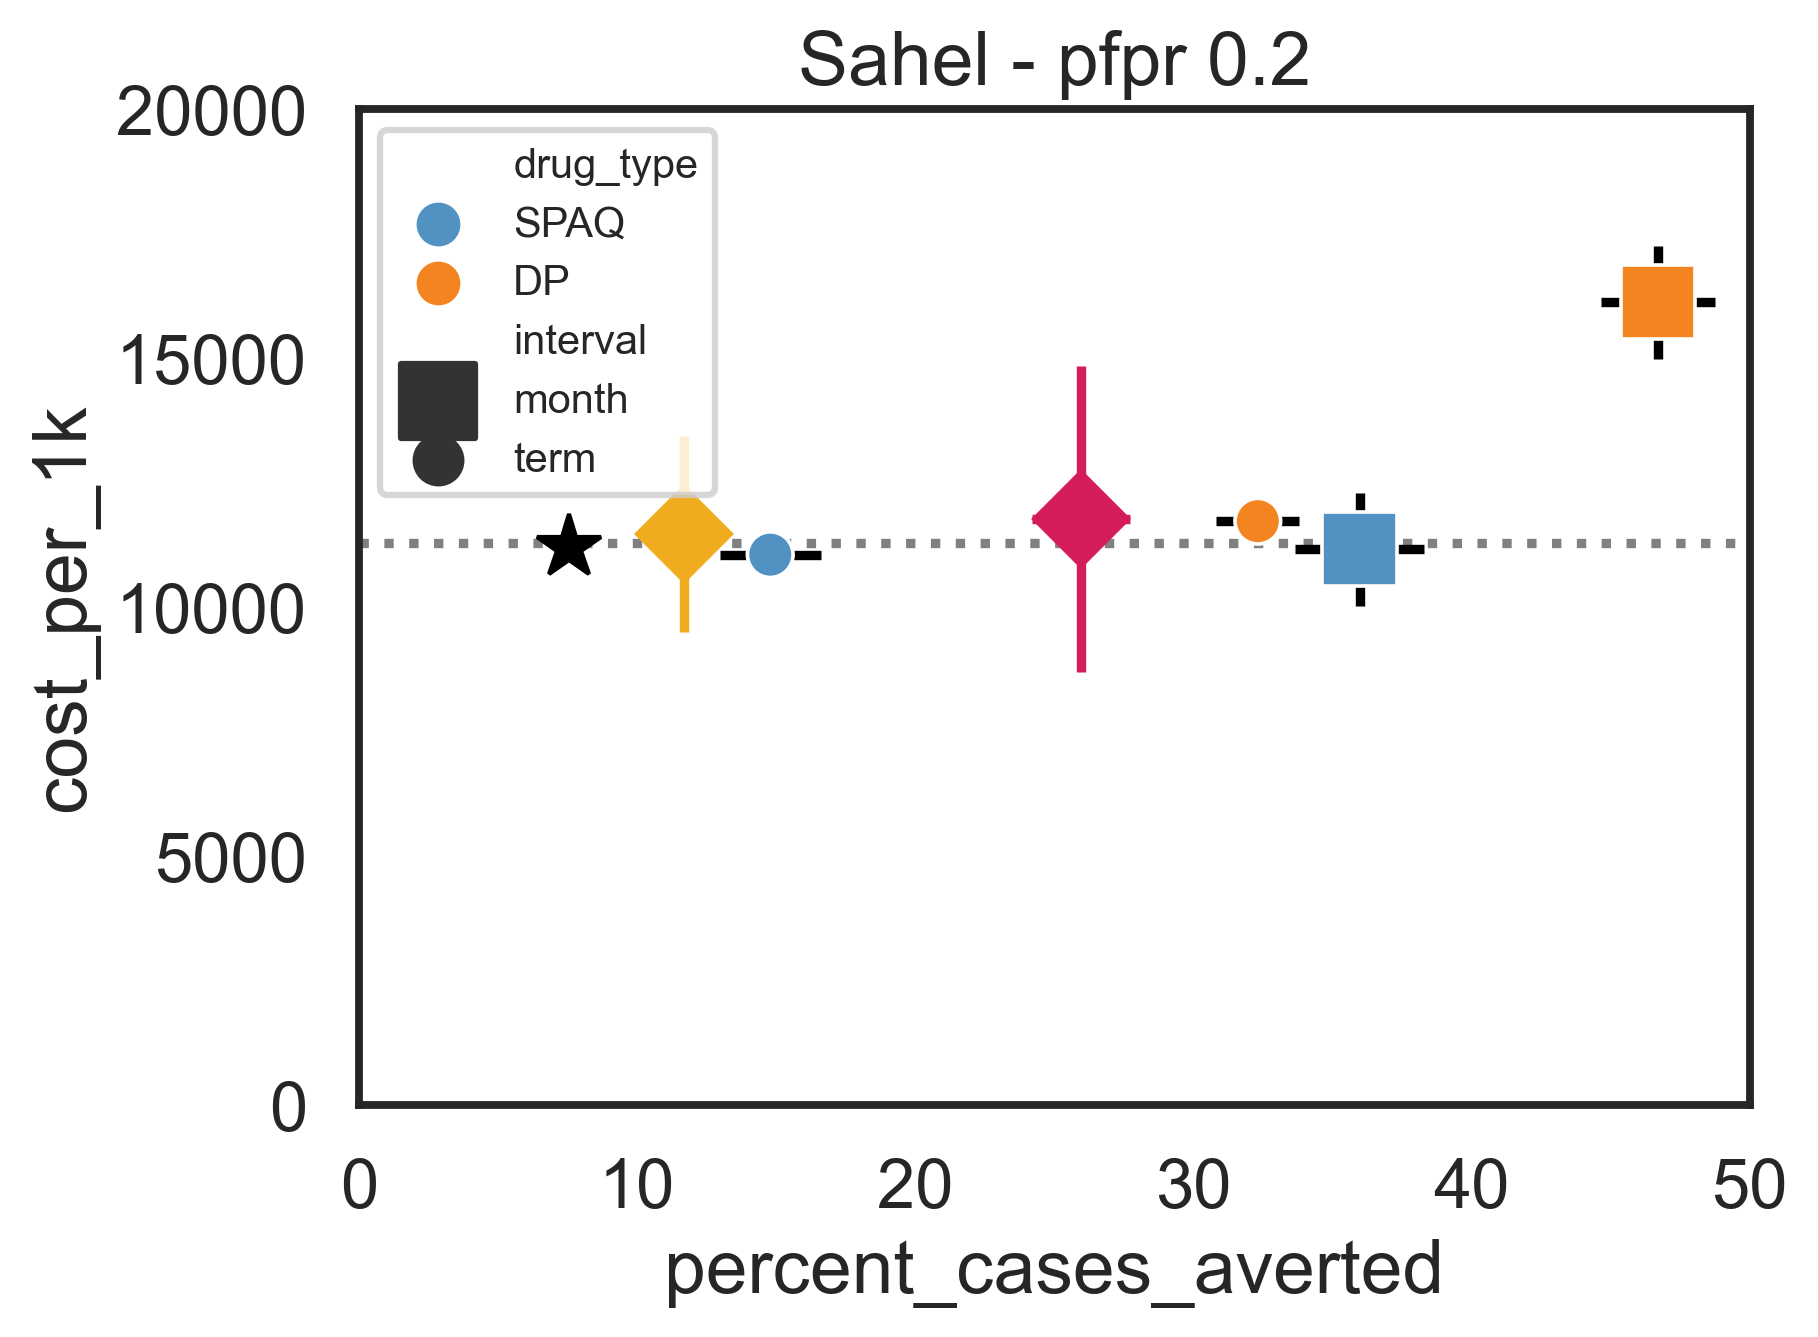

In [17]:
markersize=80
sdf = df_simpler
a = ["Sahel", 0.2]

plt.figure(dpi=300)
sdf_without_no_iptsc = sdf[np.logical_not(sdf["scenario_number"]==30)]
palette = ["#5292C2","#F48420"]
sns.scatterplot(data=sdf_without_no_iptsc, x="percent_cases_averted", y="cost_per_1k", style="interval", hue="drug_type", size="interval", 
                size_order=["month","term"], zorder=3, markers=["o","s"],palette=palette,sizes=(markersize*1.5,markersize*4))

no_iptsc = sdf[sdf["scenario_number"]==30]
plt.axhline(no_iptsc["cost_per_1k"].iloc[0], linestyle='dotted', color='gray', zorder=0)
# plt.axhspan(no_iptsc["cost_low"].iloc[0]/5, no_iptsc["cost_high"].iloc[0]/5,
#             alpha=0.2, color='gray', zorder=0)

itn_sdf = df_scatterplot_itn[np.logical_and(df_scatterplot_itn["transmission_level"]==a[1],
                                            df_scatterplot_itn["archetype"]==a[0])]
yerr = np.zeros([2,len(itn_sdf)])
yerr[0:] = itn_sdf["cost_mean"]-itn_sdf["cost_low"]
yerr[1:] = itn_sdf["cost_high"]-itn_sdf["cost_mean"]
yerr /= 5.
plt.errorbar(itn_sdf["percent_cases_averted"], 
     itn_sdf["cost_per_1k"], 
     # xerr=itn_sdf["frac_averted_clinical__all_STDEV"]*100,
     # yerr=yerr,
    linestyle="none", marker="*",
    color="black", zorder=1, markersize=markersize/5)

yerr = np.zeros([2,len(sdf_without_no_iptsc)])
yerr[0:] = sdf_without_no_iptsc["cost_mean"]-sdf_without_no_iptsc["cost_low_IPTsc_only"]
yerr[1:] = sdf_without_no_iptsc["cost_high_IPTsc_only"]-sdf_without_no_iptsc["cost_mean"]
# yerr[0:] = sdf_without_no_iptsc["cost_mean"]-sdf_without_no_iptsc["cost_low"]
# yerr[1:] = sdf_without_no_iptsc["cost_high"]-sdf_without_no_iptsc["cost_mean"]
yerr /= 5.

plt.errorbar(sdf_without_no_iptsc["percent_cases_averted"], 
             sdf_without_no_iptsc["cost_per_1k"], 
             xerr=sdf_without_no_iptsc["frac_averted_clinical__all_STDEV"]*100,
             yerr=yerr,
            linestyle="none",
            color="black", zorder=2)

if a[0] == "Sahel":
    esmc_sdf = df_sahel_extra[df_sahel_extra["transmission_level"]==a[1]]


    for s, ssdf in esmc_sdf.groupby("scenario_number"):
        if s == 35:
            smc_color = "#EFAC1F"
        elif s == 36:
            smc_color = "#D51C5B"

        yerr = np.zeros([2,len(ssdf)])
        yerr[0:] = ssdf["cost_mean"]-ssdf["cost_low_SMC_only"]
        yerr[1:] = ssdf["cost_high_SMC_only"]-ssdf["cost_mean"]
        yerr /= 5.
        plt.errorbar(ssdf["percent_cases_averted"], 
             ssdf["cost_per_1k"], 
             xerr=ssdf["frac_averted_clinical__all_STDEV"]*100,
             yerr=yerr,
            linestyle="none", marker="D",
            color=smc_color, zorder=1,markersize=markersize/5)
        # yerr = np.zeros([2,len(esmc_sdf)])
        # yerr[0:] = esmc_sdf["cost_mean"]-esmc_sdf["cost_low"]
        # yerr[1:] = esmc_sdf["cost_high"]-esmc_sdf["cost_mean"]
        # yerr /= 5.
        # plt.errorbar(esmc_sdf["percent_cases_averted"], 
        #      esmc_sdf["cost_per_1k"], 
        #      xerr=esmc_sdf["frac_averted_clinical__all_STDEV"]*100,
        #      yerr=yerr,
        #     linestyle="none", marker="D",
        #     color="purple", zorder=1)
# plt.scatter(sdf["frac_averted_clinical__all"], sdf["cost"]

#     no_iptsc = sdf[sdf["scenario_number"]==30]
#     plt.axhline(no_iptsc["cost_per1kpop_peryear"].iloc[0], color='black', linestyle='dotted')

plt.title(f"{a[0]} - pfpr {a[1]}") 
plt.legend(fontsize=10)
# plt.ylim([0,15000])
# plt.xlim([0,1])
plt.xlim([0,50])
plt.ylim([0,22000])
ax = plt.gca()
plt.yticks([0,5000,15000,10000,20000])
# plt.yticks([0,5000,15000,10000,20000,25000])

plt.tight_layout()
# plt.savefig(f"figs/{a[0]}_{str(a[1]).zfill(3)}.png")
# plt.savefig(f"figs/{a[0]}_{str(a[1]).zfill(3)}.pdf")
# plt.close("all")